This micro project of exploratory data analysis of Amazon Top 50 Bestselling Books 2009 - 2019 dataset. 
Source of dataset = https://www.kaggle.com/sootersaalu/amazon-top-50-bestselling-books-2009-2019

In [134]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

books = pd.read_csv('bestsellers with categories.csv')
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [2]:
books.shape

(550, 7)

In [3]:
books.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


Based on that information we get to know that there's 550 list of books with 7 columns consist of:
1. Name : Title of the book
2. Author
3. Average User Rating
4. Numbers of reviews written
5. Price
6. Years the book was published, and
7. Genre consist of Non-Fiction and Fiction

Check if theres NaN values from dataset:

In [3]:
books.isnull().sum()

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

There's no NaN values in dataset

In [43]:
books.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


📊**[Data Visualization]**📊

📈**Distribution**📉

Distribution of numerical value columns in dataset

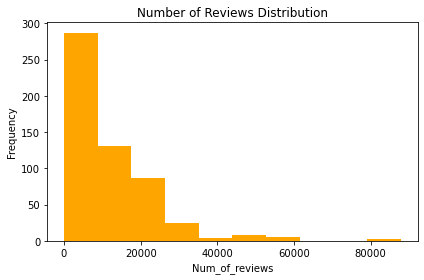

In [51]:
plt.figure()
plt.hist(x='Reviews', data=books, color='orange')
plt.title('Number of Reviews Distribution')
plt.xlabel('Num_of_reviews')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

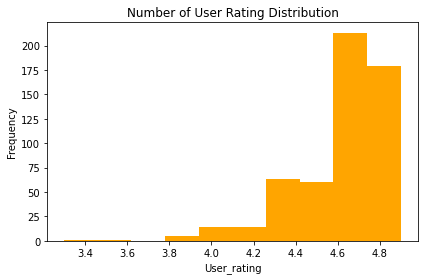

In [53]:
plt.figure()
plt.hist(x='User Rating', data=books, color='orange')
plt.title('Number of User Rating Distribution')
plt.xlabel('User_rating')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

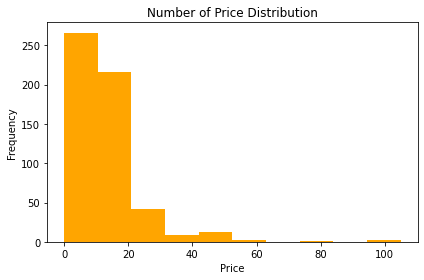

In [54]:
plt.figure()
plt.hist(x='Price', data=books, color='orange')
plt.title('Number of Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The price of bestselling books are in range of $0-20 and rarely more than 30. The ratings given are mostly higher or equal to 4.7 with the number of reviews written mostly in range of 0-20.000 reviews.

Therefore, we're going to see the correlation between price and reviews given to see if the lower number of price will lead to higher popularity, as well as price to user ratings to see if lower price lead to higher ratings.

Summary:
1. Most Books are lower price
2. Ratings are relatively high
3. Number of reviews written are in lower range 

📈**[Correlation Matrix]**📉

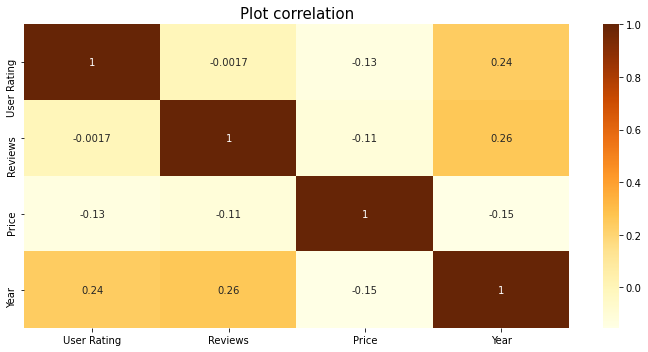

In [57]:
plt.figure(figsize=(10,5))
sns.heatmap(books.corr(), annot=True, cmap='YlOrBr')
plt.title('Plot correlation', size=15)
plt.tight_layout()
plt.show()


📈**[Scatter Plot]**📉 : Price to Number of Reviews

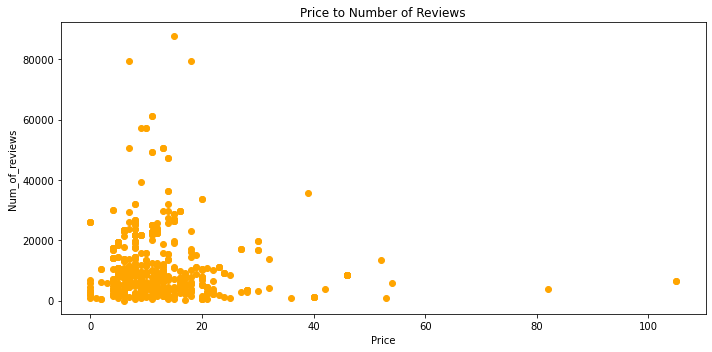

In [56]:
plt.figure(figsize=(10,5))
plt.scatter(x='Price', y='Reviews', data=books, color='orange')
plt.title('Price to Number of Reviews')
plt.xlabel('Price')
plt.ylabel('Num_of_reviews')
plt.tight_layout()
plt.show()

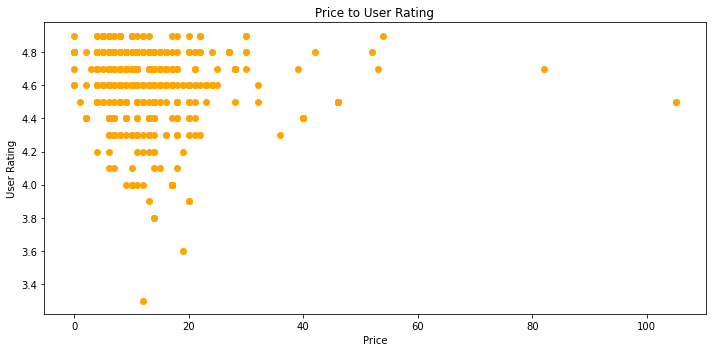

In [59]:
plt.figure(figsize=(10,5))
plt.scatter(x='Price', y='User Rating', data=books, color='orange')
plt.title('Price to User Rating')
plt.xlabel('Price')
plt.ylabel('User Rating')
plt.tight_layout()
plt.show()

From the number of correlation and scatter plot, the relation between price and rating or reviews are relatively low to no correlation. (0.0 - 0.5)

📈**[Genre Analysis]**📉

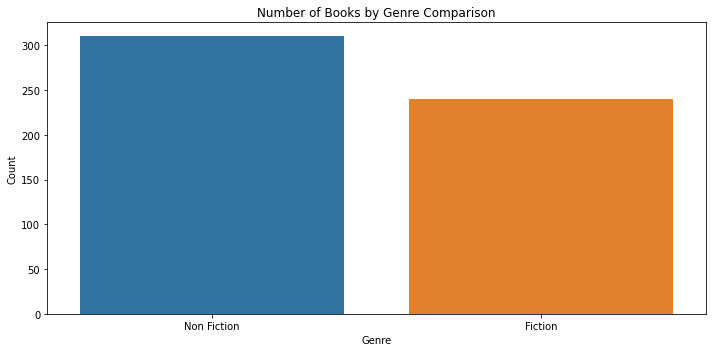

In [211]:
plt.figure(figsize=(10,5))
sns.countplot(x='Genre', data=books)
plt.title('Number of Books by Genre Comparison')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

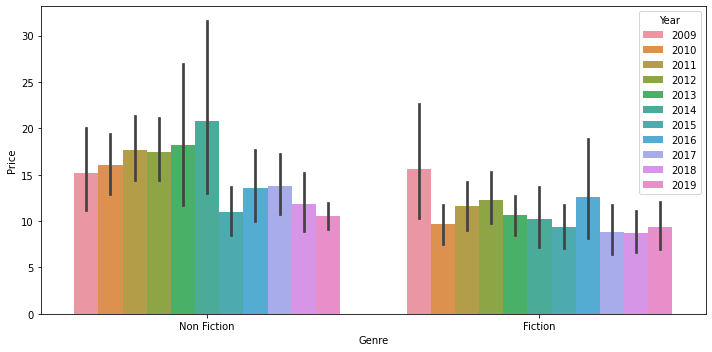

In [130]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Price', hue='Year', data=books)
plt.xlabel('Genre')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

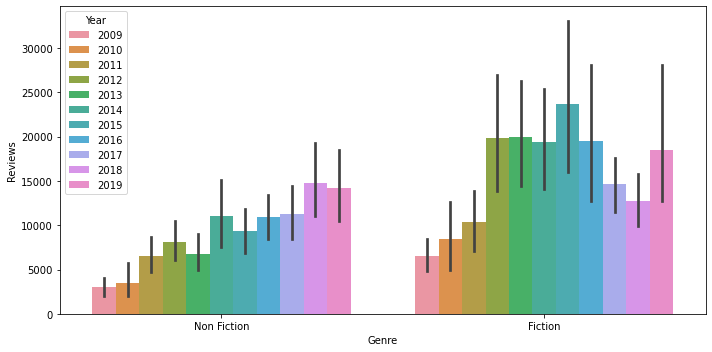

In [131]:
plt.figure(figsize=(10,5))
sns.barplot(x='Genre', y='Reviews', hue='Year', data=books)
plt.xlabel('Genre')
plt.ylabel('Reviews')
plt.tight_layout()
plt.show()

Number of bestseller in Fiction are lower than Non Fiction, while the price of the books seems to be cheaper for Fiction books. However, people who buy Fiction books seems to write more review than those who buy the Non Fictions.
To know more the details about this, we can separate the Price into two categories.
Because the distribution between Median and third quantile value is pretty high, then the category will based on third quantile.

In [188]:
books.loc[(books['Price'] > 0) & (books['Price'] <= books['Price'].quantile(0.75)), 'PriceCategory'] = 'Lower'
books.loc[(books['Price'] > books['Price'].quantile(0.75)), 'PriceCategory'] = 'Higher'
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,RatingCategory,PriceCategory
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Lower,Lower
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Lower,Higher
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Lower,Lower
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Lower,Lower
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Lower,Lower


In [192]:
books.loc[(books['User Rating'] > 0) & (books['User Rating'] < books['User Rating'].quantile(0.75)), 'RatingCategory'] = 'Lower'
books.loc[(books['User Rating'] >= books['User Rating'].quantile(0.75)), 'RatingCategory'] = 'Higher'
books.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre,RatingCategory,PriceCategory
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction,Lower,Lower
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction,Lower,Higher
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction,Lower,Lower
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction,Lower,Lower
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction,Higher,Lower


<Figure size 720x360 with 0 Axes>

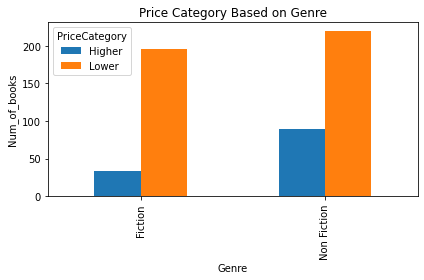

In [193]:
plt.figure(figsize=(10,5))
books.groupby(['Genre', 'PriceCategory'])['PriceCategory'].count().unstack().plot(kind='bar')
plt.title('Price Category Based on Genre')
plt.xlabel('Genre')
plt.ylabel('Num_of_books')
plt.tight_layout()
plt.show()

Even though the lower price seems to be higher for both Genre, the books with higher PriceCategory are mostly for Non Fiction.

<Figure size 720x360 with 0 Axes>

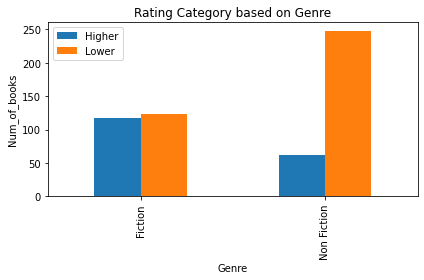

In [194]:
plt.figure(figsize=(10,5))
books.groupby(['Genre', 'RatingCategory'])['RatingCategory'].count().unstack().plot(kind='bar')
plt.title('Rating Category based on Genre')
plt.xlabel('Genre')
plt.ylabel('Num_of_books')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

Higher Rating Category are those > 4.8.
Lower rating were given more to NonFiction Books, while the review written are less than Fiction (based on prev barplot).
In summary, people who buy Fiction write more reviews with average rating better than NonFiction.